In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

In [2]:
from datetime import datetime, timedelta

start_date = datetime(2019, 8, 27)
end_date = datetime(2020, 9, 15)
date_range = [start_date + timedelta(days=x) for x in range((end_date-start_date).days + 1)]
days = [(d - datetime(1, 1, 1)).days for d in date_range]

In [3]:
# read in csv file into numpy array 
spc_N = np.loadtxt('spc_N_1.csv', delimiter=',')
spc_t = np.loadtxt('spc_time_1.csv', delimiter=',')
clasp_t = np.loadtxt('clasp_time_1.csv', delimiter=',')
#clasp_N = np.loadtxt('clasp_N_1.csv', delimiter=',')
clasp_meanR = np.loadtxt('clasp_meanR_2.csv', delimiter=',')
clasp_conc = np.loadtxt('clasp_conc_2.csv', delimiter=',')
clasp_calib = np.loadtxt('clasp_calibr_2.csv', delimiter=',')


In [4]:
clasp_t.shape

(316348, 3)

# read in spc_velocity surface



In [5]:
spc_u8cm = np.loadtxt('spc_U8cm_1.csv', delimiter = ',')
spc_u10m = np.loadtxt('/Users/ananth/Desktop/bas_github_scripts/bas_github_scripts/SP_PDF_gamma_FreyACP2019/gamma_blowsea2/spc_U10m_1.csv', delimiter = ',')

In [6]:
t1 = start_date
t2 = end_date 

# convert clasp_t and spc_t to datetime
clasp_t_new = np.array([datetime.fromordinal(int(d)) + timedelta(days=d%1) - timedelta(days = 366) for d in clasp_t[:,0]])
spc_t_new = np.array([datetime.fromordinal(int(d)) + timedelta(days=d%1) - timedelta(days = 366) for d in spc_t])

clasp_t_copy = clasp_t.copy()


# new start and end dates for conditional time
t1 = np.min(spc_t_new)
t2 = np.max(spc_t_new)

# conditional time between t1 and t2
n0 = ((clasp_t_new[:]>t1) & (clasp_t_new[:]<t2))
n2 = ((spc_t_new>t1)& (spc_t_new<t2))
#np.nansum(spc_N[n2,:],axis = 1)
print(clasp_t_new.shape, spc_t_new.shape)
print(f'clasp_min_time = {clasp_t_new[0]} ---- clasp_max_time = {clasp_t_new[-1]}')
print(f'spc_min_time = {spc_t_new[0]} ---- spc_max_time = {spc_t_new[-1]}')

(316348,) (277920,)
clasp_min_time = 2019-10-26 04:37:32.299850 ---- clasp_max_time = 2020-09-13 11:58:31.962890
spc_min_time = 2019-12-02 00:00:59.999966 ---- spc_max_time = 2020-07-30 00:00:00


Text(0.5, 0, 'Time')

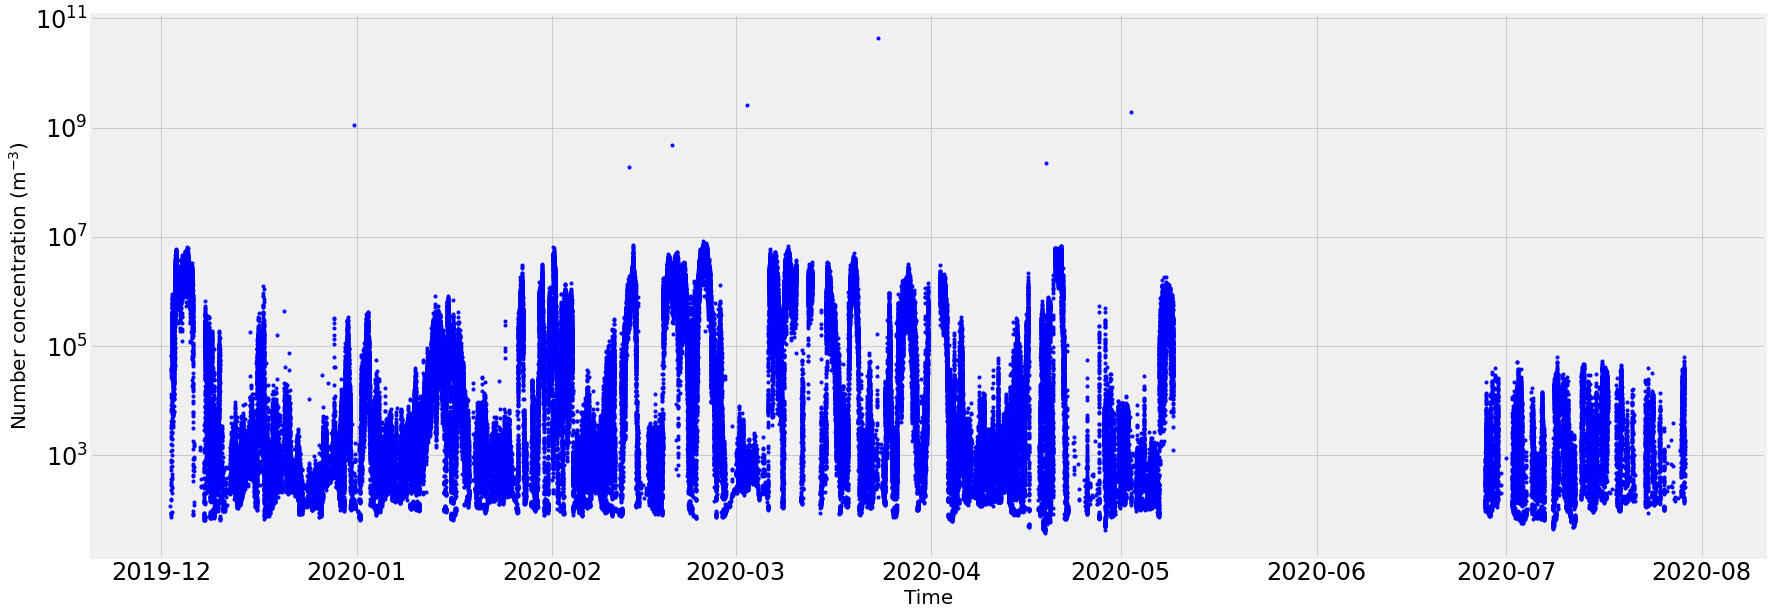

In [7]:
# plot the SPC concentration time series
plt.figure(figsize=(30,10))
plt.style.use('fivethirtyeight')
plt.plot(spc_t_new[n2], (np.nansum(spc_N[n2,:],axis = 1)), 'b.', label = 'SPC time series')

plt.yscale('log')
#plt.ylim([1e2,1e6])
plt.yticks(fontsize = 24)
plt.xticks(fontsize = 24)
plt.ylabel('Number concentration (m$^{-3}$)', fontsize = 20)
plt.xlabel('Time', fontsize = 20)


Text(0.5, 1.0, 'SPC measurements -- N (snow particles / m$^{3}$) ')

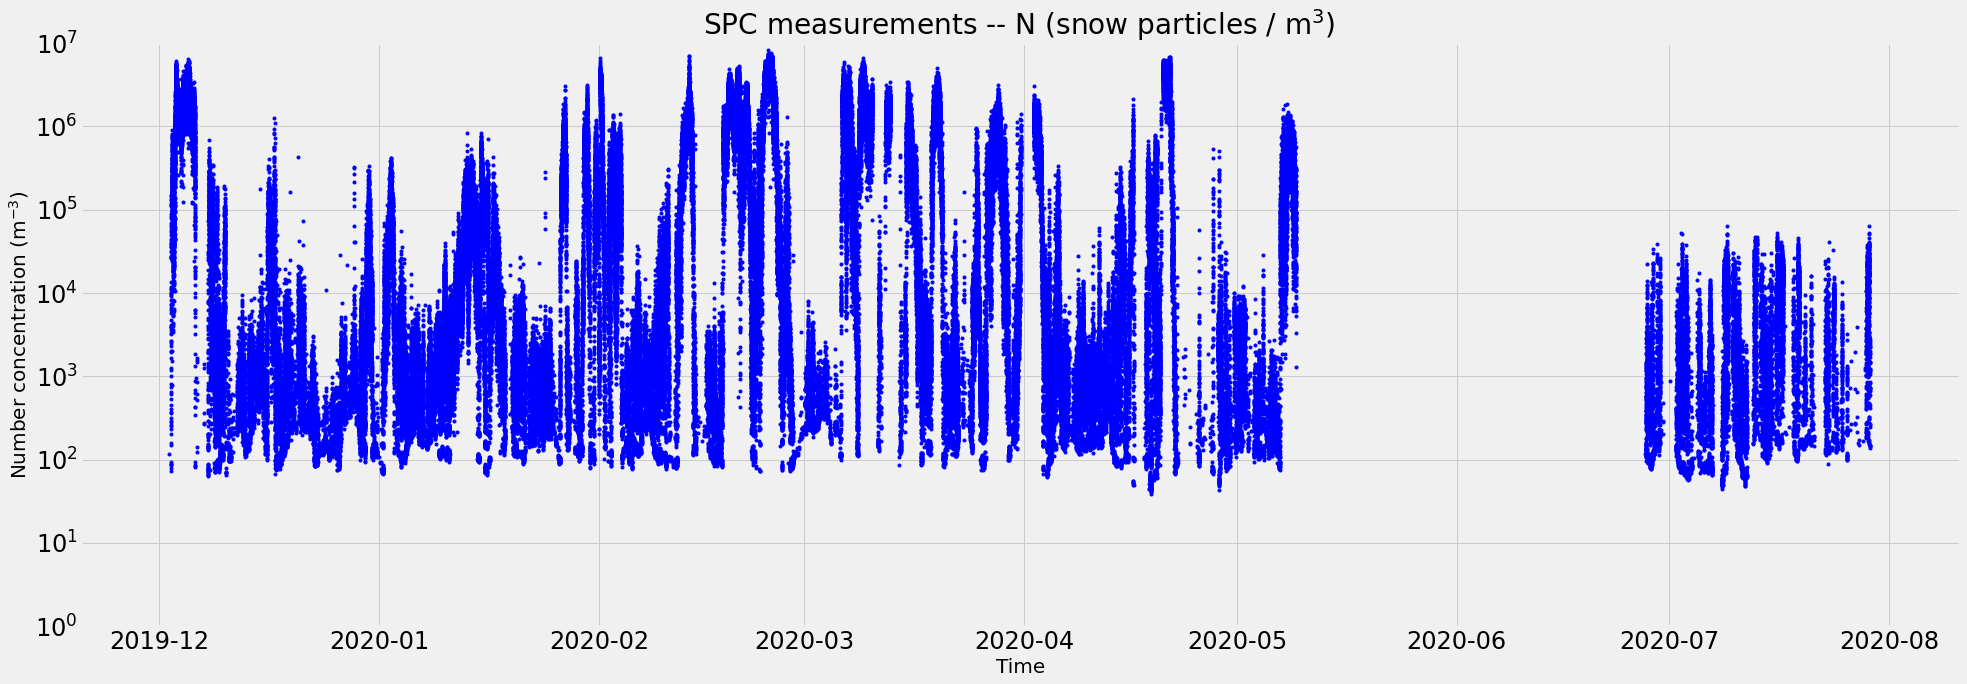

In [8]:
# make the same plot with a rolling mean of 1 week 
plt.figure(figsize=(30,10))
plt.style.use('fivethirtyeight')

# calculate the weekly rolling mean and time rolling mean and plot
plt.plot(spc_t_new[n2], (np.nansum(spc_N[n2,:],axis = 1)), 'b.', label = 'SPC time series')    

# plot new time and rolling mean
#plt.plot(spc_t_new[n2], pd.Series(np.nansum(spc_N[n2,:],axis = 1)).rolling(window=7).mean(), 'b.', label = 'SPC time series')

window_size = 7

# Calculate the moving average
spc_N_ma = np.convolve(np.nansum(spc_N[n2,:],axis=1), np.ones((window_size,))/window_size, mode='valid')

# Plot the moving average
#plt.plot(spc_t_new[n2][window_size//2:-window_size//2], spc_N_ma[:(len(spc_N_ma)-1)], 'r-', linewidth = 0.4,label='Moving Average')

plt.yscale('log')
plt.ylim([1,1e7])
plt.yticks(fontsize = 24)
plt.xticks(fontsize = 24)
plt.ylabel('Number concentration (m$^{-3}$)', fontsize = 20)
plt.xlabel('Time', fontsize = 20)
plt.title('SPC measurements -- N (snow particles / m$^{3}$) ', fontsize = 28)



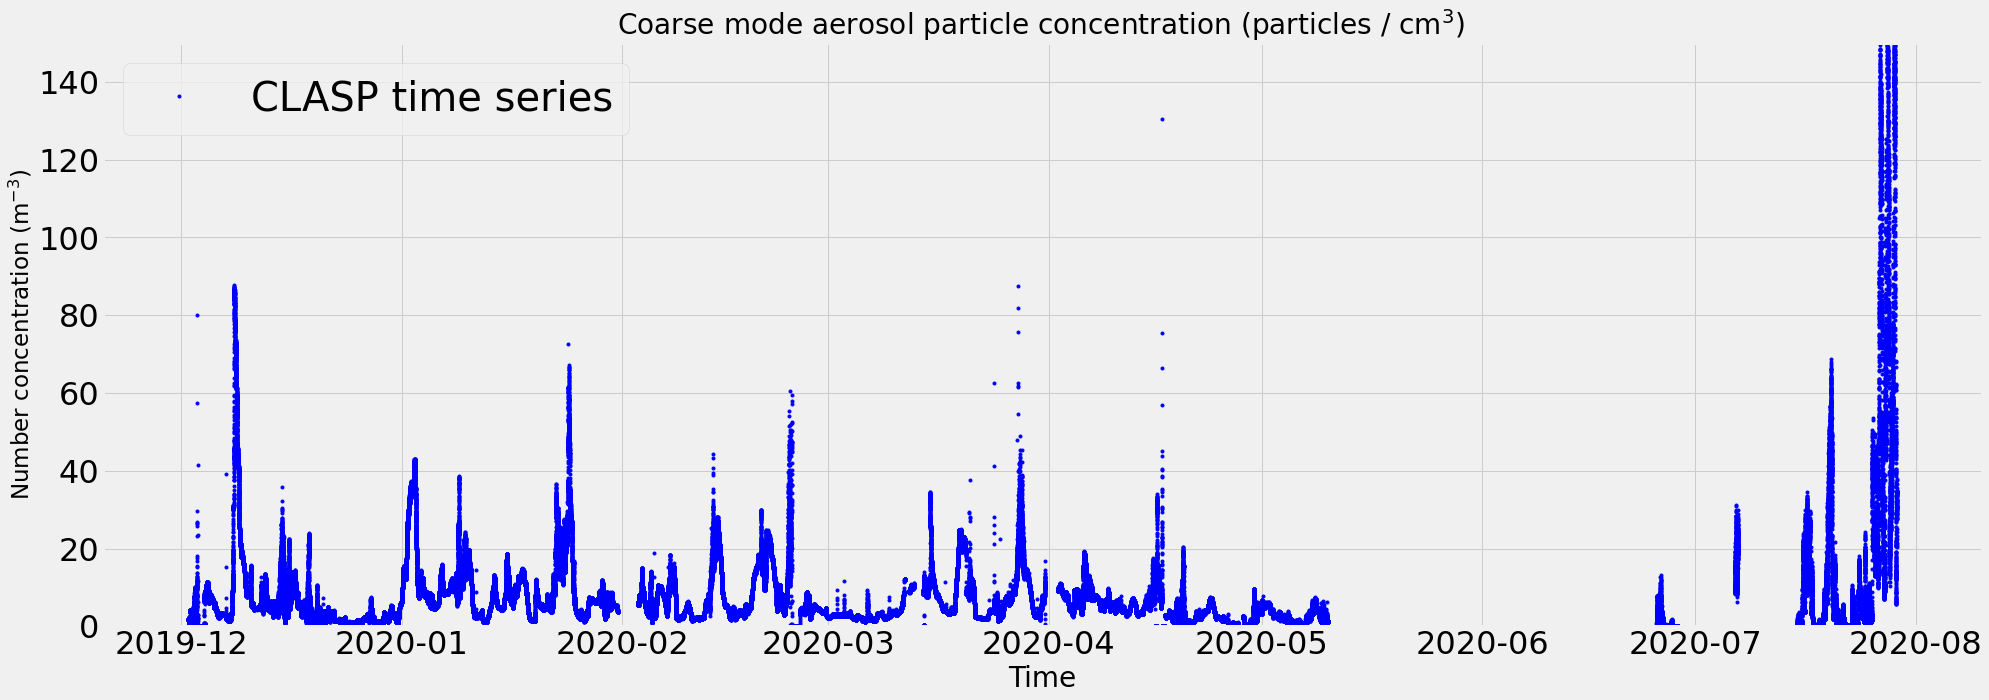

In [9]:
# plot the CLASP data
plt.figure(figsize=(30,10))
plt.style.use('fivethirtyeight')
plt.plot(clasp_t_new[n0], np.nansum(clasp_conc[n0,:], axis = 1), 'b.', label = 'CLASP time series')
#plt.yscale('log')
plt.title('Coarse mode aerosol particle concentration (particles / cm$^{3}$) ', fontsize = 28)
plt.xticks(fontsize = 32)
plt.yticks(fontsize = 32)
plt.ylabel('Number concentration (m$^{-3}$)', fontsize = 23)
plt.xlabel('Time', fontsize = 28)
plt.ylim([0, 150])
plt.legend(fontsize = 40)

# plot of both clasp and spc_velocity

(array([-2.5,  0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. ]),
 [Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, '')])

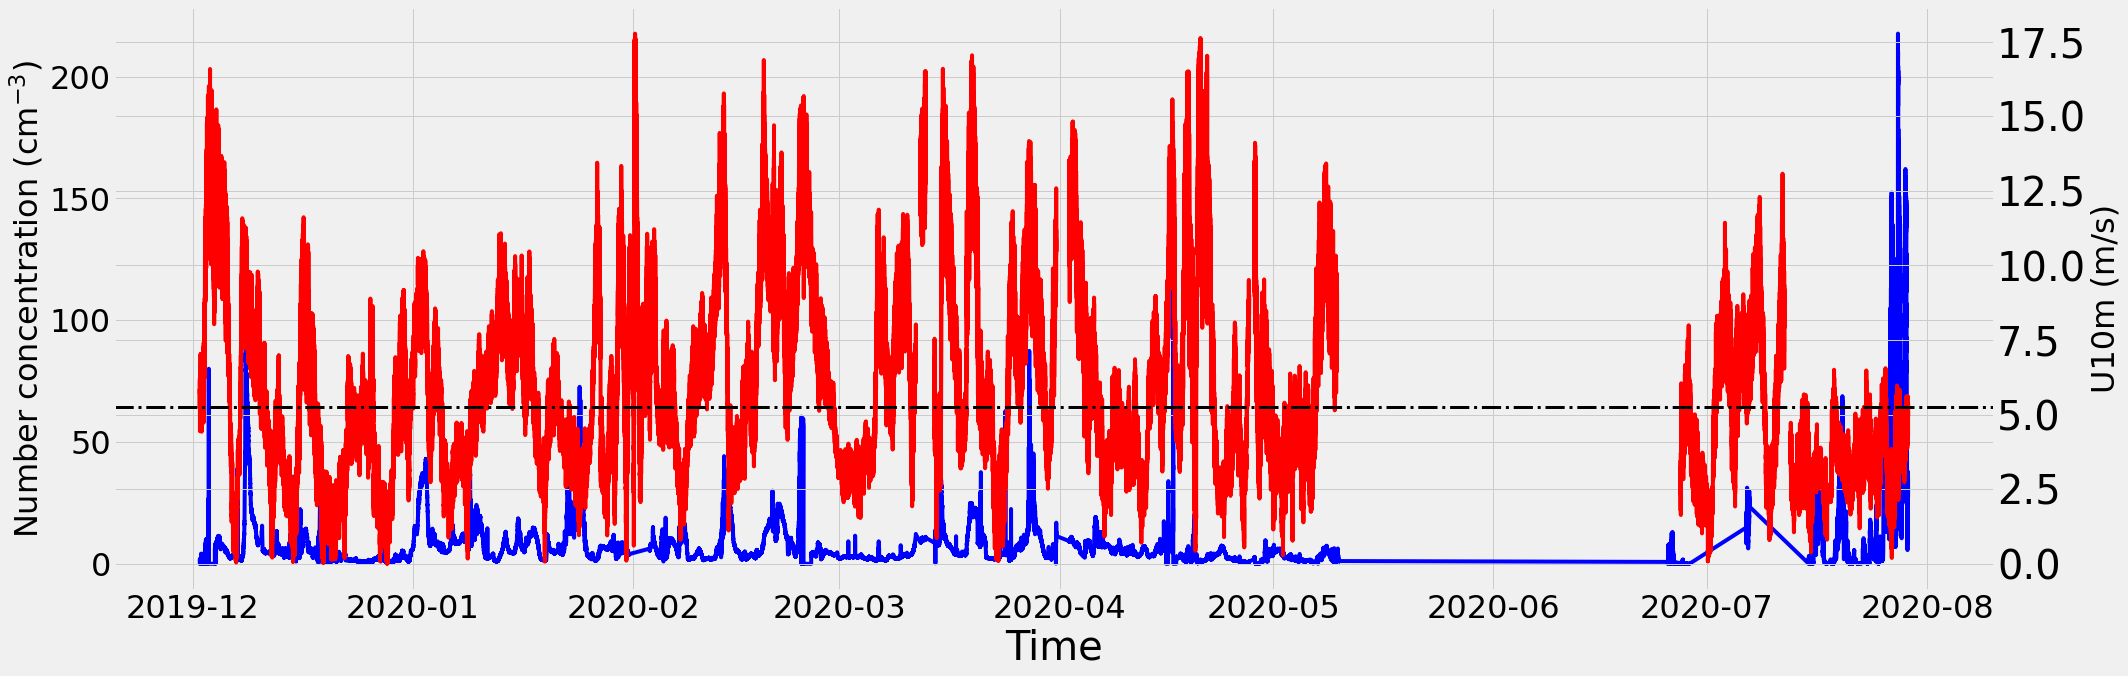

In [33]:
# plot the CLASP data
plt.figure(figsize=(30,10))
plt.style.use('fivethirtyeight')

# plot first y axis data 
plt.plot(clasp_t_new[n0], np.nansum(clasp_conc[n0,:], axis = 1), 'b-', label = 'Aerosol concentration (> 2.5 $\mu$m)')
#plt.yscale('log')
# ylabel for first y axis
plt.ylabel('Number concentration (cm$^{-3}$)', fontsize = 32)
plt.xlabel('Time', fontsize = 40)
#plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5, fontsize = 40)
plt.yticks(fontsize = 32)
plt.xticks(fontsize = 32)
# plot second y axis data
plt.twinx()
plt.plot(spc_t_new[n2], spc_u10m[n2], 'r', label = 'U10m')
plt.ylabel('U10m (m/s)', fontsize = 32)

#plt.yscale('log')
#plt.title('CLASP measurements -- coarse mode particles concentration (particles / cm$^{3}$) ', fontsize = 28)
#plt.xticks(fontsize = 32)
#plt.yticks(fontsize = 32)
#plt.ylabel('Number concentration (m$^{-3}$)', fontsize = 23)

# plot a bold red line at 5.25m/s
plt.axhline(y=5.25, color='k', linestyle='-.', linewidth = 3, label = 'Threshold wind speed')
plt.xticks(fontsize = 40)
plt.yticks(fontsize = 40)
# add legend to the bottom of the plot
#plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5, fontsize = 40)


#plt.yscale('log')
#plt.ylim([9500,1e4])

In [40]:
mask_u1 = (spc_u10m > 5.25)

spc_u10m_slice = spc_u10m[mask_u1]

# percentage of time that the wind speed is above 5.25m/s
print(f'Percentage of time that the wind speed is above 5.25m/s = {len(spc_u10m_slice)/len(spc_u10m)*100:.2f}%')

mask_u2 = (spc_u10m_slice > 5.25) & (spc_u10m_slice < 9)

spc_u10m_slice2 = spc_u10m_slice[mask_u2]

# percentage of time that the wind speed is between 5.25m/s and 8m/s
print(f'Percentage of time that the wind speed is between 5.25m/s and 8m/s = {len(spc_u10m_slice2)/len(spc_u10m_slice)*100:.2f}%')


Percentage of time that the wind speed is above 5.25m/s = 47.15%
Percentage of time that the wind speed is between 5.25m/s and 8m/s = 67.50%


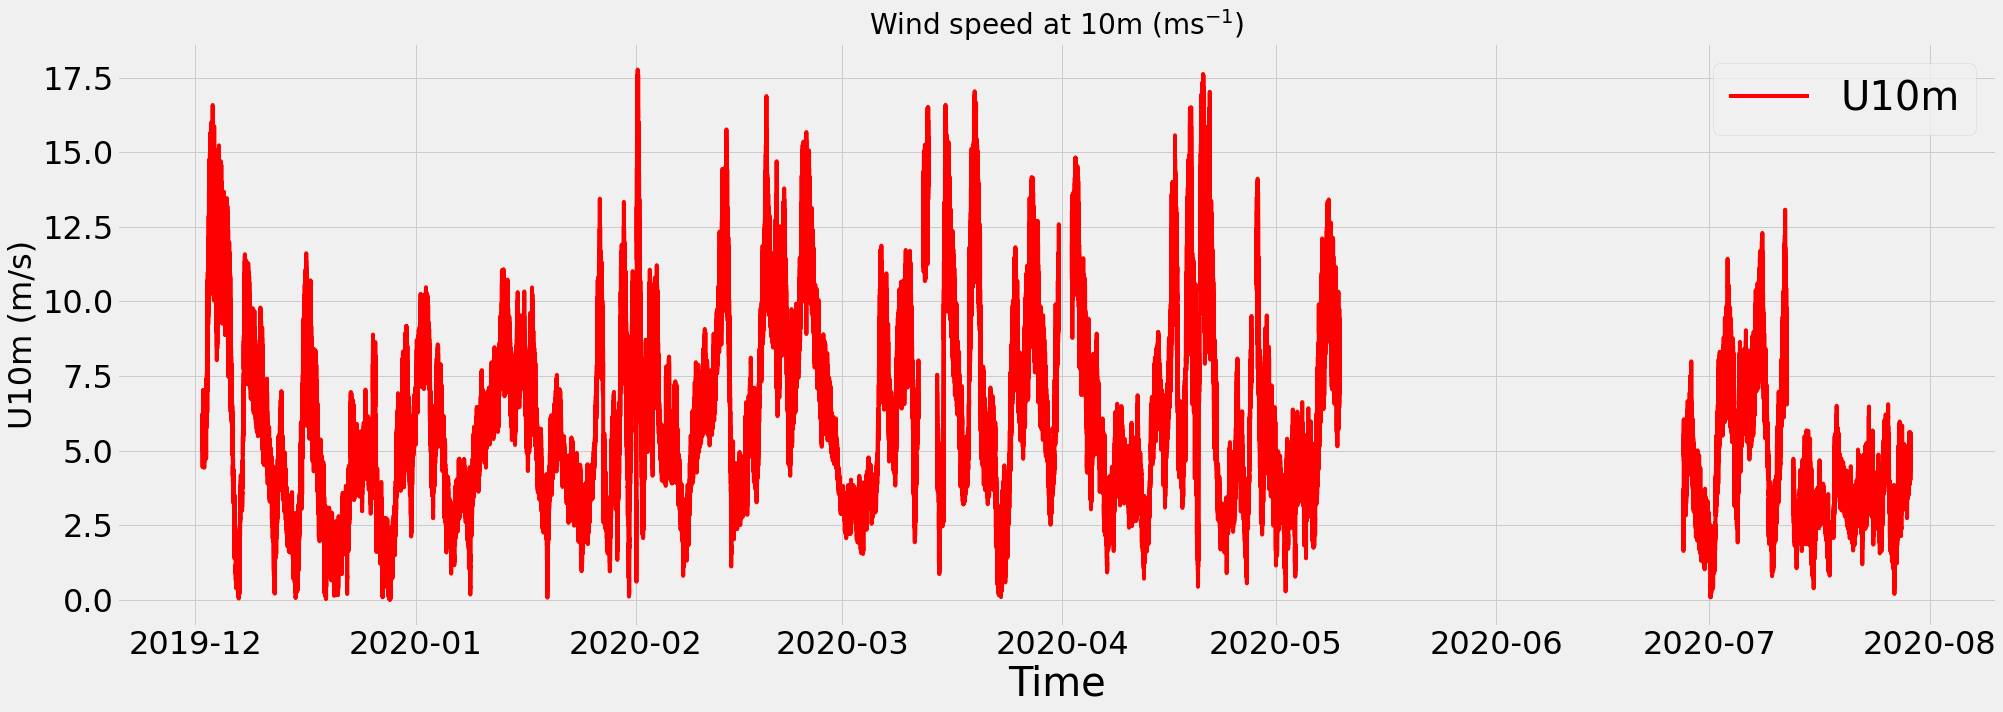

In [11]:
# plot the CLASP data
plt.figure(figsize=(30,10))
plt.style.use('fivethirtyeight')

# plot first y axis data 


# plot second y axis data
plt.plot(spc_t_new[n2], spc_u10m[n2], 'r-', label = 'U10m')
plt.ylabel('U10m (m/s)', fontsize = 32)

#plt.yscale('log')
plt.title('Wind speed at 10m (ms$^{-1}$)', fontsize = 28)
plt.xticks(fontsize = 32)
plt.yticks(fontsize = 32)
#plt.ylabel('Number concentration (m$^{-3}$)', fontsize = 23)
plt.xlabel('Time', fontsize = 40)
plt.legend(fontsize = 40)
#plt.yscale('log')
#plt.ylim([9500,1e4])

/Users/ananth/miniconda3/envs/tensorflow_env/lib/python3.7/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.


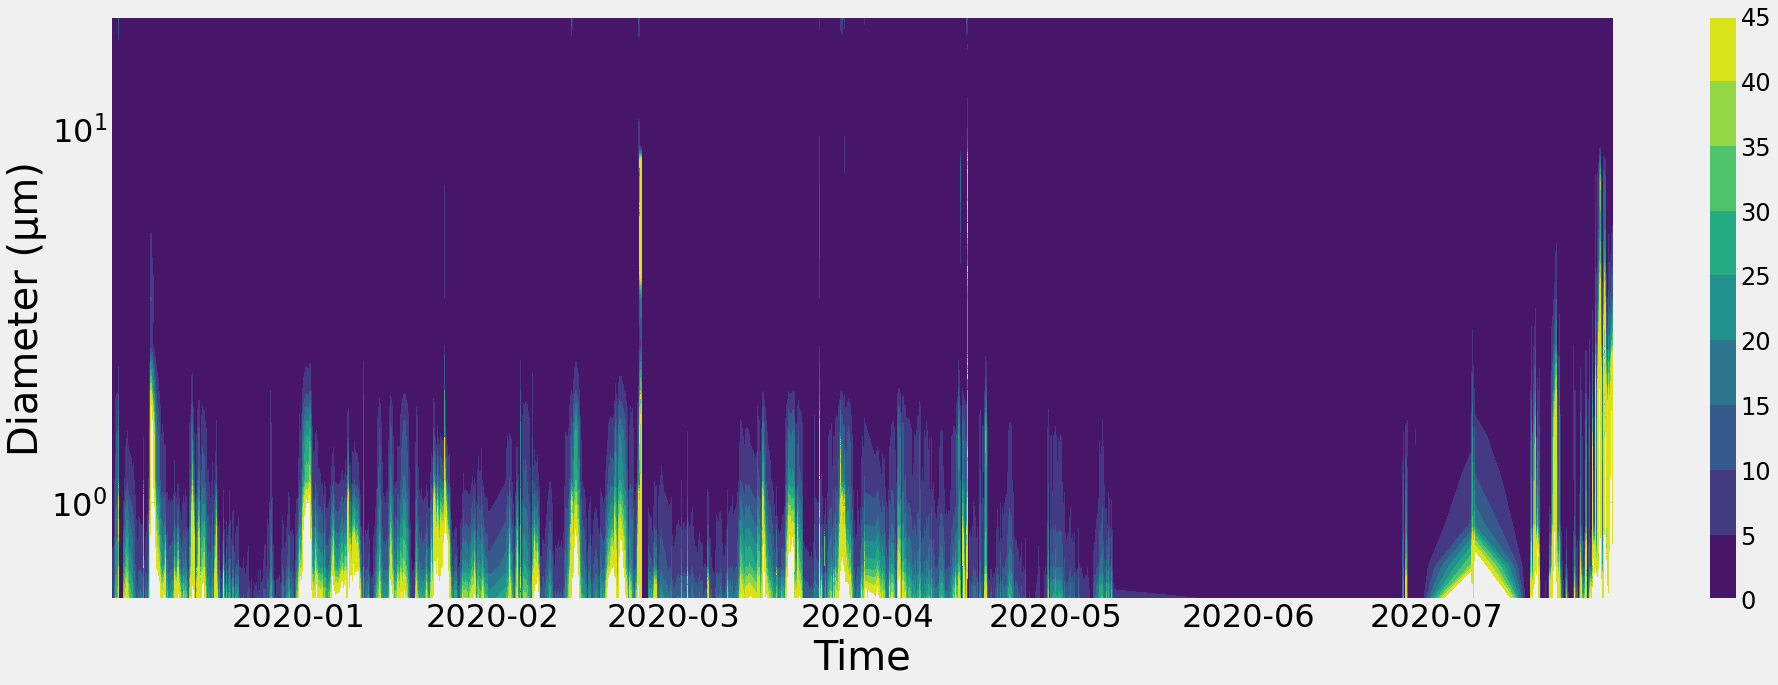

In [12]:
# plot the CLASP data
dlogD = np.diff(np.log10(clasp_calib*2))
dlogD = dlogD.reshape((1,16))
dNdlogD = clasp_conc[n0,0:16]/np.tile(dlogD, (243273, 1))
plt.figure(figsize=(30,10))
v = np.linspace(0, 50, 100)
v = np.arange(0,50,5)
plt.contourf(clasp_t_new[n0], clasp_meanR[0, :]*2, dNdlogD.T, levels=v)
##plt.colorbar(label)
plt.yscale('log')
#plt.ylim([1e-3,1e-1])
#plt.title('CLASP measurements', fontsize = 28)
plt.xticks(fontsize = 32)
plt.yticks(fontsize = 32)
plt.ylabel('Diameter (μm)', fontsize = 40)
plt.xlabel('Time', fontsize = 40)
# increase font size of colorbar
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=24)



In [13]:
print(clasp_t_new.shape, clasp_meanR[0, :].shape, dNdlogD.T.shape, spc_u10m.shape)
print(clasp_t.shape, spc_t.shape, spc_u10m.shape)

(316348,) (16,) (16, 243273) (277920,)
(316348, 3) (277920,) (277920,)


# make plot of distribution of clasp N vs velocity


In [14]:
# we have clasp N time series, but also velocity time series, now I want to plot N vs velocity
# first, I need to interpolate the velocity time series to the same time as the N time series
# then, I can plot N vs velocity

# interpolate the velocity time series to the same time as the N time series

from scipy.interpolate import interp1d
# take a slice of spc time series

interp_1d = interp1d(spc_t, spc_u10m, kind = 'linear')
interp_nn = interp1d(spc_t, spc_u10m, kind = 'nearest')

mask_2 = (clasp_t[:,0]>np.min(spc_t)) & (clasp_t[:,0]<np.max(spc_t))


clasp_t_slice = clasp_t[mask_2,0]
clasp_conc_slice = clasp_conc[mask_2,:]
clasp_u10_1d = interp_1d(clasp_t_slice)
clasp_u10_nn = interp_nn(clasp_t_slice)
clasp_u10m_new = np.interp(clasp_t_slice, spc_t, spc_u10m)
#clasp_u10m_new_nearest = interp1d(clasp_t, spc_t, spc_u10m, kind = 'nearest')

print(clasp_u10m_new.shape, clasp_conc_slice.shape)


(243273,) (243273, 16)


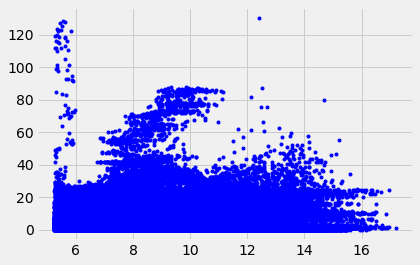

In [15]:
# make 
mask_3 = clasp_u10_1d > 5.25 # greater than threshold wind speed
plt.plot(clasp_u10_1d[mask_3], np.nansum(clasp_conc_slice[mask_3,:], axis = 1), 'b.')




/Users/ananth/miniconda3/envs/tensorflow_env/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  # Remove the CWD from sys.path while we load stuff.


(5.25, 13.0)

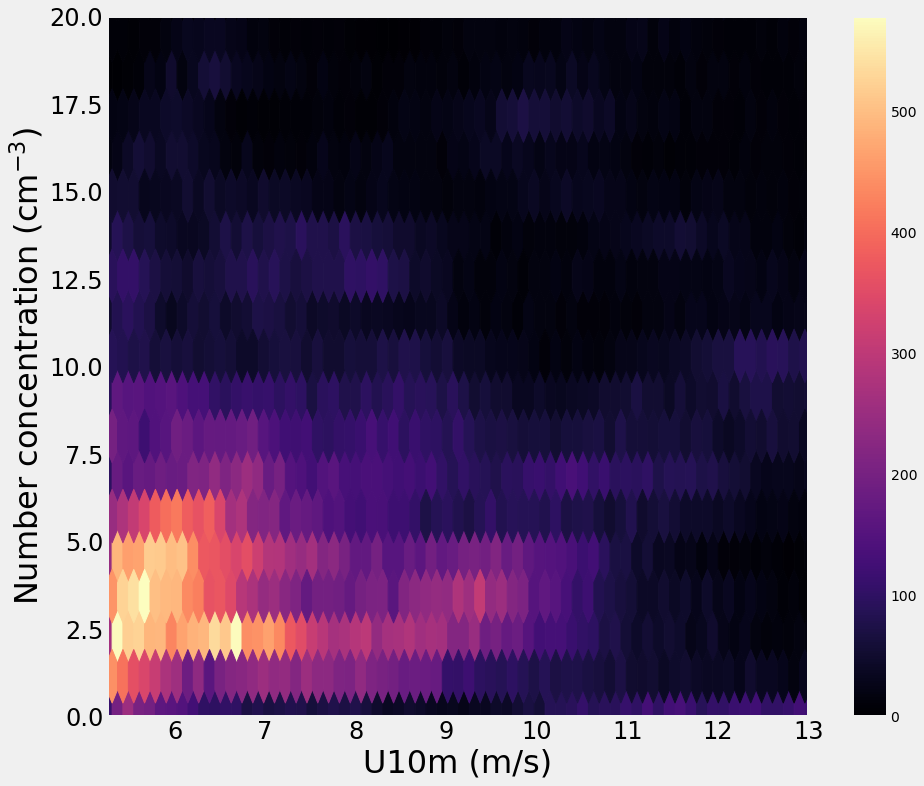

In [31]:
# make a contour denisty plot of N vs velocity with hexagonal bins
plt.figure(figsize=(14,12))
plt.style.use('fivethirtyeight')
plt.hexbin(clasp_u10_1d[mask_3], np.nansum(clasp_conc_slice[mask_3,:], axis = 1), gridsize = 100, cmap = 'magma')
plt.xlabel('U10m (m/s)', fontsize = 32)
plt.ylabel('Number concentration (cm$^{-3}$)', fontsize = 32)
plt.xticks(fontsize =24)
plt.yticks(fontsize = 24)
#plt.title('Number concentration vs wind speed', fontsize = 32)
plt.colorbar()
plt.ylim([0, 20])
plt.xlim([5.25, 13])


In [28]:
import numpy as np

# Convert datetime array to numeric array
clasp_time_numeric = clasp_time.astype('datetime64[s]').astype('float64')

# Perform interpolation using numeric arrays
spc_u10m_clasp = np.interp(clasp_time_numeric, spc_t_new[n2], spc_u10m[n2])


TypeError: Cannot cast array data from dtype('O') to dtype('float64') according to the rule 'safe'

In [29]:
import numpy as np

# Create Boolean mask for NaN values in spc_u10m
mask = ~np.isnan(spc_u10m)

# Select numeric values from spc_t_new and spc_u10m using mask
spc_t_new_numeric = spc_t_new[mask]
spc_u10m_numeric = spc_u10m[mask]

# Convert datetime array to numeric array
clasp_time_numeric = clasp_time.astype('datetime64[s]').astype('float64')

# Perform interpolation using numeric arrays
spc_u10m_clasp = np.interp(clasp_time_numeric, spc_t_new_numeric[n2], spc_u10m_numeric[n2])


IndexError: boolean index did not match indexed array along dimension 0; dimension is 266478 but corresponding boolean dimension is 277920

In [30]:
import numpy as np

# Create Boolean mask for NaN values in spc_t_new
mask = ~np.isnan(spc_t_new)

# Select numeric values from spc_t_new and spc_u10m using mask
spc_t_new_numeric = spc_t_new[mask]
spc_u10m_numeric = spc_u10m[mask]

# Convert datetime array to numeric array
clasp_time_numeric = clasp_time.astype('datetime64[s]').astype('float64')

# Perform interpolation using numeric arrays
spc_u10m_clasp = np.interp(clasp_time_numeric, spc_t_new_numeric[n2], spc_u10m_numeric[n2])


TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [34]:
spc_t

array([737761.00069444, 737761.00138889, 737761.00208333, ...,
       738001.99861111, 738001.99930556, 738002.        ])

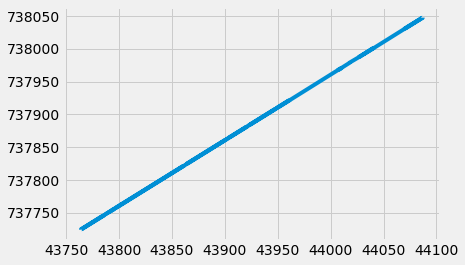

In [39]:
plt.plot(clasp_t_excel, clasp_t[])

In [41]:
diff = clasp_t_excel - clasp_t[:,0]
diff

array([-693960.19273495, -693960.1934293 , -693960.19412365, ...,
       -693960.49759236, -693960.49828671, -693960.49898105])

In [43]:
is_increasing = np.all(np.diff(clasp_t) > 0)

print(is_increasing)  # Output: True

False


In [54]:
clasp_conc.shape

(316348, 16)

In [59]:
clasp_u10m_new.shape

(4,)

In [60]:
clasp_t.shape

(4,)